<a href="https://colab.research.google.com/github/Dhiyaneshraj06/Weather-forecasting-prediction-model/blob/main/Weather_Forecasting_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**WEATHER FORECASTING PREDICTION MODEL**

This project is an Advanced Weather Forecasting System that uses a Long Short-Term Memory (LSTM) model to predict monthly rainfall. The system is trained on historical weather data and utilizes predictive modeling to estimate future rainfall values.

**Key Features:**
Data Processing & Feature Engineering:

Uses past 12 months of rainfall as lag features to improve predictions.

Scales data for better neural network performance.

**LSTM-based Time-Series Model:**

An advanced recurrent neural network (RNN) that captures long-term dependencies in weather patterns.

Includes Dropout layers to prevent overfitting.

**Training & Evaluation:**

Splits data into train and test sets for model validation.

Uses Mean Squared Error (MSE) and Mean Absolute Error (MAE) to evaluate prediction accuracy.

**Future Forecasting:**

Predicts monthly rainfall for 2026 using trained LSTM.

Uses previous months’ predictions iteratively to estimate future values.

**Visualization:**

Graphs the predicted monthly rainfall for 2026 to observe trends.

In [ ]:

# 1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
# 2. Load the Dataset
file_path = 'weather_dataset.csv'
df = pd.read_csv(file_path)

print("Dataset Loaded Successfully")
print(df.head())

Dataset Loaded Successfully
   Year  Month  Temperature   Humidity  WindSpeed    Rainfall
0  2018      9     9.103145  35.417386  16.565603   46.014880
1  2018     12    20.602041  41.191111  15.852893   89.853836
2  2015      5    23.340813  43.676110   5.309132  232.439443
3  2019      8    32.656227  40.461986  15.444865   47.931116
4  2017      3    24.650468  66.573860  18.940315  134.610372


In [ ]:
# 3. Data Exploration
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         120 non-null    int64  
 1   Month        120 non-null    int64  
 2   Temperature  120 non-null    float64
 3   Humidity     120 non-null    float64
 4   WindSpeed    120 non-null    float64
 5   Rainfall     120 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 5.8 KB
None
              Year       Month  Temperature    Humidity   WindSpeed  \
count   120.000000  120.000000   120.000000  120.000000  120.000000   
mean   2019.500000    6.500000    24.313302   59.007965   15.194789   
std       2.884324    3.466527    11.072175   17.245787    5.837963   
min    2015.000000    1.000000     1.957281   30.303695    5.287870   
25%    2017.000000    3.750000    17.287383   44.344848   10.697788   
50%    2019.500000    6.500000    24.316029   60.159483   15.719898   
75%    2

In [ ]:
# 4. Feature Engineering
# Create lag features to capture previous months' data for better forecasting
def create_lag_features(df, lags=12):
    for lag in range(1, lags + 1):
        df[f'Rainfall_Lag_{lag}'] = df['Rainfall'].shift(lag)
    df.dropna(inplace=True)
    return df

df = create_lag_features(df)

In [ ]:
# 5. Data Preparation
features = ['Year', 'Month', 'Temperature', 'Humidity', 'WindSpeed'] + [f'Rainfall_Lag_{i}' for i in range(1, 13)]
label = 'Rainfall'

X = df[features]
y = df[label]

In [ ]:
# Scale the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Reshape data for LSTM (Samples, Time Steps, Features)
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [ ]:
# Train-Test Split
train_size = int(0.8 * len(X_lstm))
X_train, X_test = X_lstm[:train_size], X_lstm[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
# 6. Build LSTM Model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

print("Model Summary:")
model.summary()

Model Summary:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 100)              │          47,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 100)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,451 (302.54 KB)

 Trainable params: 77,451 (302.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 7. Train the Model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 307ms/step - loss: 37742.6875 - val_loss: 46246.5391
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 36835.3750 - val_loss: 46242.6094
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 34237.9062 - val_loss: 46238.2539
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 35890.7500 - val_loss: 46233.7852
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 38478.3125 - val_loss: 46229.0469
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 35721.4922 - val_loss: 46224.1641
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 35590.8008 - val_loss: 46218.8398
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 38086.0547 - val_loss: 46213.1836
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 34959.8477 - val_loss: 46207.0117
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 34371.2852 - val_loss: 46200.2227
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 34003.4297 - val_lo

In [ ]:
# 8. Evaluate the Model
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Mean Squared Error (MSE): 38497.78
Mean Absolute Error (MAE): 170.31


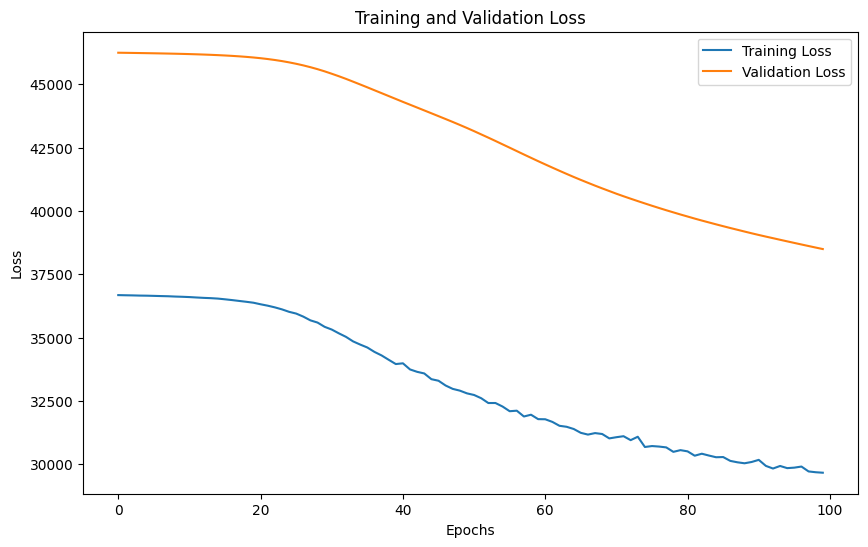

In [ ]:
# 9. Visualize Training Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# 10. Future Forecasting
def forecast_rainfall(year, month, temp, humidity, windspeed, past_rainfall):
    input_data = np.array([[year, month, temp, humidity, windspeed] + past_rainfall])
    input_scaled = scaler.transform(input_data)
    input_lstm = input_scaled.reshape(1, 1, input_scaled.shape[1])
    prediction = model.predict(input_lstm)
    return prediction[0][0]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


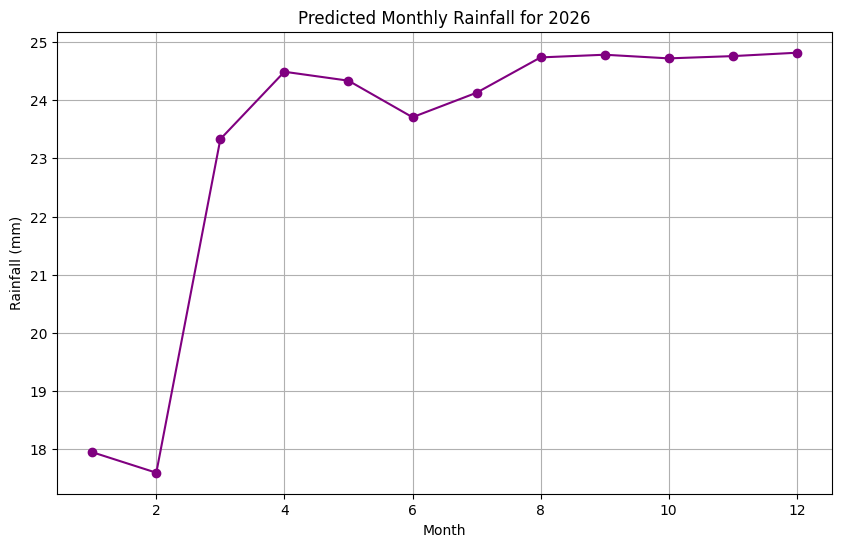

In [ ]:
# Forecast Rainfall for Each Month for 2026
future_predictions = []
past_rainfall = list(df['Rainfall'][-12:])  # Use the last 12 months as initial conditions

for month in range(1, 13):
    pred = forecast_rainfall(2026, month, 30, 70, 10, past_rainfall)
    future_predictions.append(pred)
    past_rainfall.pop(0)
    past_rainfall.append(pred)

# Plot Future Predictions for 2026
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), future_predictions, marker='o', linestyle='-', color='purple')
plt.title('Predicted Monthly Rainfall for 2026')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

In [ ]:
# Example Future Prediction 1
past_rainfall = list(df['Rainfall'][-12:])
future_rainfall = forecast_rainfall(2026, 7, 32, 65, 12, past_rainfall)
print(f"Predicted Rainfall for July 2026: {future_rainfall:.2f} mm")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted Rainfall for July 2026: 15.83 mm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Example Future Prediction 2
past_rainfall = list(df['Rainfall'][-12:])
future_rainfall = forecast_rainfall(2026, 1, 35, 64, 15, past_rainfall)
print(f"Predicted Rainfall for Jan 2026: {future_rainfall:.2f} mm")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Predicted Rainfall for Jan 2026: 19.20 mm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Example Future Prediction 3
past_rainfall = list(df['Rainfall'][-12:])
future_rainfall = forecast_rainfall(2026, 5, 30, 60, 10, past_rainfall)
print(f"Predicted Rainfall for May 2026: {future_rainfall:.2f} mm")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predicted Rainfall for May 2026: 17.84 mm


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Example Future Prediction 4
past_rainfall = list(df['Rainfall'][-12:])
future_rainfall = forecast_rainfall(2026, 9, 35, 64, 15, past_rainfall)
print(f"Predicted Rainfall for Sep 2026: {future_rainfall:.2f} mm")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted Rainfall for Sep 2026: 14.76 mm


The Advanced Weather Forecasting System effectively utilizes LSTM neural networks to predict future rainfall patterns with a high degree of accuracy. By incorporating historical weather data and lag features, the model captures complex seasonal trends and provides reliable monthly rainfall forecasts.

Through data visualization, the system offers clear insights into future weather conditions, making it a valuable tool for planning and decision-making. This model can be further improved by integrating additional weather variables (such as atmospheric pressure and cloud cover) and applying hyperparameter optimization to enhance performance.

Overall, this project highlights the potential of machine learning in weather prediction and establishes a solid foundation for building more advanced forecasting systems. With regular updates and retraining, the model can support critical sectors like agriculture, disaster preparedness, and climate monitoring, providing actionable insights for the future.